This is Week homework from [Statistical Rethinking](https://github.com/rmcelreath/stat_rethinking_2020/tree/main/homework) using Python. (A public repo using `pmyc3` has been created [here](https://github.com/pymc-devs/resources/tree/master/Rethinking_2) that also uses Python. It will helpful for me to do these exercises myself, but that repo will serve as a helpful reference.

In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

from scipy.optimize import curve_fit

<IPython.core.display.Javascript object>

In [4]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


<IPython.core.display.Javascript object>

# Question 1 (7H3)

Consider three fictional Polynesian islands. On each there is a Royal Ornithologist charged by the king with surveying the birb population. They have each found the following proportions of 5 important birb species:

In [5]:
df_birb = pd.DataFrame(
    {
        "Birb A": [0.2, 0.8, 0.05],
        "Birb B": [0.2, 0.1, 0.15],
        "Birb C": [0.2, 0.05, 0.7],
        "Birb D": [0.2, 0.025, 0.05],
        "Birb E": [0.2, 0.025, 0.05],
    },
    index=["Island 1", "Island 2", "Island 3"],
)

df_birb

,Birb A,Birb B,Birb C,Birb D,Birb E
Island 1,0.20,0.20,0.20,0.200,0.200
Island 2,0.80,0.10,0.05,0.025,0.025
Island 3,0.05,0.15,0.70,0.050,0.050


<IPython.core.display.Javascript object>

- Notice that each row sums to 1, all the birbs. This problem has two parts. It is not computationally complicated. But it is conceptually tricky.
- First, compute the entropy of each island’s birb distribution. Interpret these entropy values.
- Second, use each island’s birb distribution to predict the other two. This means to compute the K-L Divergence of each island from the others, treating each island as if it were a statistical model of the other islands. You should end up with 6 different K-L Divergence values. Which island predicts the others best? Why?


## Compute entropy

**From looking at the values, I would predict that Island 1 has the higher information entropy.**

Shannon's information entropy equation:

$H(p) = -\text{E}\log(p_i) = - \displaystyle \sum_{i=1}^n p_i\log(p_i)$

In words: *Uncertainty in a probability distribution is average (minus) log-probability of an event.*

$p_i$ is a **vector** of probability of different events. In this case, it would be a row in the table above.

In [6]:
# Didn't get the right answer with this code

# def calc_entropy(vector_i):
#     for i in vector_i:
#         holder = list()
#         print(i)
#         holder.append(i * np.log(i))

#     return -(np.sum(holder))

<IPython.core.display.Javascript object>

In [7]:
def calc_entropy(vector_i):
    return -np.sum(vector_i * np.log(vector_i))

<IPython.core.display.Javascript object>

In [8]:
calc_entropy(df_birb.loc["Island 1", :])

1.6094379124341005

<IPython.core.display.Javascript object>

In [9]:
calc_entropy(df_birb.loc["Island 2", :])

0.7430039367341686

<IPython.core.display.Javascript object>

In [10]:
calc_entropy(df_birb.loc["Island 3", :])

0.9836002995230935

<IPython.core.display.Javascript object>

**We can see that Island 1 has the highest information entropy. The raw values at first glance might be harder to guess of what would be higher entropy from Island 3 and Island 2, but I saw that Island 3 has slightly fewer extreme values.**

## Compute K-L Divergence

**I would predict that Island 1 has smaller information distance than the others. It has higher entropy.**

The Kullback-Leibler Divergence (KLD) score is given by the equation:

$D_\text{KL}(p, q) = \displaystyle \sum_{i}p_i(\log(p_i) - \log(q_i))$

The lecture and text stated that *p* is assigned to the "truth" but in this case we will use it for each island, when it serves as a reference model.

In the lecture equation, the code to calculate KLD inputted a set of values from 0.01 to 0.99 but here, I will rely on the fact that the vectors being compared are equal.

In [11]:
# Not the right answer with this function

# def calc_kld(vector_p, vector_q):
#     """
#     Calculate K-L divergence. p is the reference vector.
#     This assumes both vectors are equal length.
#     """
#     for i in range(len(vector_p)):
#         holder = list()
#         holder.append(vector_p[i] * (np.log(vector_p[i]) - np.log(vector_q[i])))

#     return np.sum(holder)

<IPython.core.display.Javascript object>

In [12]:
def calc_kld(vector_p, vector_q):
    """
    Calculate K-L divergence. p is the reference vector.
    The order of the vectors being inputted matters.
    """
    return np.sum(vector_p * (np.log(vector_p) - np.log(vector_q)))

<IPython.core.display.Javascript object>

In [13]:
# def calc_kld(vector_p, vector_q):
#     """
#     Alternate forumula, gives same answer.
#     """
#     return np.sum(vector_p * (np.log(vector_p / vector_q)))

<IPython.core.display.Javascript object>

**Island 1 as reference**

In [14]:
calc_kld(df_birb.loc["Island 1", :], df_birb.loc["Island 2", :])

0.9704060527839236

<IPython.core.display.Javascript object>

In [15]:
calc_kld(df_birb.loc["Island 1", :], df_birb.loc["Island 3", :])

0.638760437463217

<IPython.core.display.Javascript object>

**Island 2 as reference**

In [16]:
calc_kld(df_birb.loc["Island 2", :], df_birb.loc["Island 1", :])

0.8664339756999315

<IPython.core.display.Javascript object>

In [17]:
calc_kld(df_birb.loc["Island 2", :], df_birb.loc["Island 3", :])

2.010914241472248

<IPython.core.display.Javascript object>

**Island 3 as reference**

In [18]:
calc_kld(df_birb.loc["Island 3", :], df_birb.loc["Island 1", :])

0.6258376129110066

<IPython.core.display.Javascript object>

In [19]:
calc_kld(df_birb.loc["Island 3", :], df_birb.loc["Island 2", :])

1.8388451788909108

<IPython.core.display.Javascript object>

**Here we see that Island 1 has smaller information distance than the others in most cases, consistent with our expectation since it has higher entropy. What is interesting is going from Island 3 to Island 1. It's smaller than the other way around. This isn't explained in the homework solutions!**


## Another way of thinking about this

Another way of thinking it is that a distribution is a point in space. And in this case, Island 1 is in the middle... closer to the other islands than the other islands are to each other.

# Question 2 (7H4)

**Recall the marriage, age, and happiness collider bias example from Chapter 6. Run models `m6.9` and `m6.10` again. Compare these two models using WAIC (or LOO, they will produce identical results). Which model is expected to make better predictions? Which model provides the correct causal inference about the influence of age on happiness? Can you explain why the answers to these two questions disagree?**

Let's briefly take a look at the data to remind ourselves about what this set entails. The relied on simulated data so that we *know* the true relationship between `age` and `happiness` (there is none).

In [20]:
# Some functions taken from repo to produce the data


def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))


def sim_happiness(N_years=100, seed=1234):
    np.random.seed(seed)

    popn = pd.DataFrame(np.zeros((20 * 65, 3)), columns=["age", "happiness", "married"])
    popn.loc[:, "age"] = np.repeat(np.arange(65), 20)
    popn.loc[:, "happiness"] = np.repeat(np.linspace(-2, 2, 20), 65)
    popn.loc[:, "married"] = np.array(popn.loc[:, "married"].values, dtype="bool")

    for i in range(N_years):
        # age population
        popn.loc[:, "age"] += 1
        # replace old folk with new folk
        ind = popn.age == 65
        popn.loc[ind, "age"] = 0
        popn.loc[ind, "married"] = False
        popn.loc[ind, "happiness"] = np.linspace(-2, 2, 20)

        # do the work
        elligible = (popn.married == 0) & (popn.age >= 18)
        marry = (
            np.random.binomial(1, inv_logit(popn.loc[elligible, "happiness"] - 4)) == 1
        )
        popn.loc[elligible, "married"] = marry

    popn.sort_values("age", inplace=True, ignore_index=True)

    return popn

<IPython.core.display.Javascript object>

In [21]:
d = sim_happiness()
d2 = d.copy().loc[d.age > 17]
d2["A"] = (d2["age"].copy() - 18) / (65 - 18)  # standardizes age
d2.head()

,age,happiness,married,A
360,18,0.526316,True,0.0
361,18,0.736842,False,0.0
362,18,0.947368,False,0.0
363,18,1.157895,False,0.0
364,18,2.000000,False,0.0


<IPython.core.display.Javascript object>

## Re-visiting the models

As a reminder, both of these models have to do with how `marriage` status influences our interpretation of `age` on `happiness`. The purpose of these models is to show how conditioning on a collider will generate a spurious association. Model `m6.9` includes marriage `status` while model `m6.10` omits it.

Here are the two models, with variables defined:


Model `m6.9`
<br>
$\text{happiness}_i$ ~ Normal($\mu_i, \sigma$)
<br>
$\mu_i(\text{mid}) = \alpha(\text{mid}) + \beta(x_i  - \bar{x})$
<br>
$\alpha(\text{mid}) $ ~ $\text{Normal}(0, 1)$
<br>
$\beta_\text{age}$ ~ $\text{Normal}(0, 2)$
<br>
$\sigma$ ~ $\text{Exp}(1)$


Model `m6.10`
<br>
$\text{happiness}_i$ ~ Normal($\mu_i, \sigma$)
<br>
$\mu_i = \alpha + \beta(x_i  - \bar{x})$
<br>
$\alpha $ ~ $\text{Normal}(0, 1)$
<br>
$\beta_\text{age}$ ~ $\text{Normal}(0, 2)$
<br>
$\sigma$ ~ $\text{Exp}(1)$


The notation is showing marriage status as an indexed categorical variable. Let's add that into the dataframe.

In [22]:
d2["mid"] = pd.Categorical(d2.loc[:, "married"].astype(int))  # Code modified from repo.
d2.head()

,age,happiness,married,A,mid
360,18,0.526316,True,0.0,1
361,18,0.736842,False,0.0,0
362,18,0.947368,False,0.0,0
363,18,1.157895,False,0.0,0
364,18,2.000000,False,0.0,0


<IPython.core.display.Javascript object>

Now let's look at both models and their results again. (Note that code was modified from pymc repo.)

In [84]:
with pm.Model() as m_6_9:
    """
    Model with marriage status included in the model.
    """
    # Note that the shape parameter is is a way to get both marriage statuses represented in the alpha prior
    a = pm.Normal("a", 0, 1, shape=2)
    b_age = pm.Normal("b_age", 0, 2)

    mu = a[d2["mid"]] + b_age * d2["A"]
    sigma = pm.Exponential("sigma", 1)

    happiness = pm.Normal("happiness", mu, sigma, observed=d2["happiness"])

    m_6_9_trace = pm.sample(1000, return_inferencedata=False)

az.summary(m_6_9_trace, round_to=2)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age, a]
INFO:pymc3:NUTS: [sigma, b_age, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],-0.20,0.07,-0.31,-0.10,0.0,0.0,1678.67,1673.02,1684.67,2148.68,1.0
a[1],1.21,0.09,1.07,1.36,0.0,0.0,1745.09,1745.09,1744.06,2111.52,1.0
b_age,-0.71,0.12,-0.91,-0.51,0.0,0.0,1575.31,1575.31,1575.44,1733.99,1.0
sigma,1.02,0.02,0.99,1.06,0.0,0.0,2412.71,2412.71,2410.87,2275.24,1.0


<IPython.core.display.Javascript object>

My answers are close to what was in the book. Note that I got the following warning but I will ignore it for now.
```
The acceptance probability does not match the target. It is 0.8805062183114042, but should be close to 0.8. Try to increase the number of tuning steps.
WARNING:pymc3:The acceptance probability does not match the target. It is 0.8805062183114042, but should be close to 0.8. Try to increase the number of tuning steps.
```

In [83]:
with pm.Model() as m_6_10:
    """
    Model with marriage status OMITTED from the model.
    """
    # Changed the shape parameter to 1, but could probably omit.
    a = pm.Normal("a", 0, 1, shape=1)
    b_age = pm.Normal("b_age", 0, 2)

    mu = a + b_age * d2["A"]
    sigma = pm.Exponential("sigma", 1)

    happiness = pm.Normal("happiness", mu, sigma, observed=d2["happiness"])

    m_6_10_trace = pm.sample(1000, return_inferencedata=False)

az.summary(m_6_10_trace, round_to=2)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age, a]
INFO:pymc3:NUTS: [sigma, b_age, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
The acceptance probability does not match the target. It is 0.8820845982550845, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8829043675742148, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],-0.00,0.08,-0.14,0.12,0.0,0.0,1684.17,1431.66,1680.26,1703.42,1.0
b_age,0.00,0.14,-0.22,0.23,0.0,0.0,1697.19,1317.57,1697.78,1913.61,1.0
sigma,1.22,0.03,1.17,1.26,0.0,0.0,2030.64,2030.64,2016.57,2247.87,1.0


<IPython.core.display.Javascript object>

We're able to replicate the result from the book where we have no association between `age` and `happiness` as we predicted (since we created the data by simulation).

Before we move on to calculating WAIC, we can already start anticipating answers to the questions:

- **Which model is expected to make better predictions?** In the linear regression setting, we would expect model `m_6_9`, the model with more parameters, to make better predictions, even though inference would be incorrect.
- **Which model provides the correct causal inference about the influence of age on happiness?** Model `m_6_10` has correctly accounted for the DAG, to make interpretation of causal inference more accurate.
- Can you explain why the answers to these two questions disagree?

## Calculating WAIC for each model

The equation of WAIC is the following:

$\text{WAIC}(y, \Theta) = 2(\text{lppd} - \displaystyle \sum_{i=1} \text{var}_\Theta p(y_i | \Theta)$ )

where `lppd` is the log-pointwise-predictive-density

$\text{lppd}(y, \Theta) = \displaystyle \sum_{i=1} \text{log} \frac{1}{\text{S}} \displaystyle \sum_{s}p(y_i | \Theta_s) $ 


$\Theta$ is our posterior distribution and $y$ represents data. The lower case *s* means for a set of parameters. For both models, we have the parametrs `a`, `b`, and `sigma`, but remember that model `m_6_9` has two levels represented, one for each marriage status.

What does that practically mean in our calculation?

We can get the posterior values for each parameter and calculate for each.

In [104]:
def get_logprob_m10(model_trace, n_samples):
    """
    Calculating log probability for each model.
    This assumes that pm.sample(return_inferencedata=True).
    Example usage: get_logprob(m_6_10_trace)
    Code includes adaptation of R code 7.20, 7.21
    """
    
    n_samples = 1000
    n_cases = d2.shape[0]
    logprob = np.zeros((n_cases, n_samples))

    for s in range(0, n_samples):
        mu = m_6_10_trace["a"][s] + m_6_10_trace["b_age"][s] * d2["age"]
        p_ = stats.norm.logpdf(d2["happiness"], loc=mu, scale=m_6_10_trace["sigma"][s])
        logprob[:, s] = p_
    
    return logprob

<IPython.core.display.Javascript object>

In [105]:
get_logprob_m10(m_6_10_trace, 1000)

array([[ -2.24060183,  -1.24357517,  -1.32767587, ...,  -1.3564565 ,
         -1.14747191,  -2.93372002],
       [ -2.52688581,  -1.33457905,  -1.43804055, ...,  -1.48621756,
         -1.13212372,  -2.61036344],
       [ -2.8448601 ,  -1.45406065,  -1.57589065, ...,  -1.64511252,
         -1.14571258,  -2.31823495],
       ...,
       [ -3.43285573,  -2.17468866,  -1.65146533, ...,  -1.32996449,
         -8.47033326, -53.04046049],
       [ -8.18689514,  -1.14333663,  -1.28208713, ...,  -1.53530528,
         -3.77712147, -38.094261  ],
       [-16.47974046,  -2.70277297,  -3.48278105, ...,  -4.53118214,
         -1.31146042, -24.45404084]])

<IPython.core.display.Javascript object>

**I realized I don't have to do these calculations. There's a `compare` function in arviz.**

This function documentation is [here](https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html).

In [106]:
compare_df = az.compare(
    {
        "m_6_9": m_6_9_trace,
        "m_6_10": m_6_10_trace,
    },
    method="pseudo-BMA",
    ic="waic",
    scale="deviance",
)
compare_df

/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m_6_9,0,2710.831368,3.593085,0.000000,1.000000e+00,37.276599,0.000000,False,deviance
m_6_10,1,3037.606104,2.447729,326.774736,1.100950e-71,27.330610,33.008913,False,deviance


<IPython.core.display.Javascript object>

WAIC generally estimates out-of-sample deviance and therefore a lower score is representative of better prediction. As we expected, model `m_6_9`, the model with more parameters, made better predictions, even though inference would be incorrect. Model `m_6_10` by this metric makes worse predictions but has the more representative causal relationship.

# Question 3 (7H5)

**Reconsider the urban fox analysis from last week’s homework. Use WAIC or LOO based model comparison on five different models, each using weight as the outcome, and containing these sets of predictor variables:**

1. avgfood + groupsize + area
2. avgfood + groupsize
3. groupsize + area
4. avgfood
5. area

**Can you explain the relative differences in WAIC scores, using the fox DAG from last week’s homework? Be sure to pay attention to the standard error of the score differences (dSE).**

In [107]:
# Read in and standardize data
d = pd.read_csv("../data/a_input/foxes.csv", header=0)
d2 = d.copy()
col2standardize = ["avgfood", "groupsize", "area", "weight"]
d2[col2standardize] = (d[col2standardize] - d[col2standardize].mean()) / d[
    col2standardize
].std()

d2.head()

,group,avgfood,groupsize,area,weight
0,1,-1.924829,-1.524089,-2.239596,0.414135
1,1,-1.924829,-1.524089,-2.239596,-1.427046
2,2,-1.118035,-1.524089,-1.205508,0.675954
3,2,-1.118035,-1.524089,-1.205508,1.300942
4,3,-1.319734,-1.524089,-1.130106,1.115135


<IPython.core.display.Javascript object>

In [108]:
with pm.Model() as weights_model1:

    # Priors
    a = pm.Normal("a", mu=0, sd=0.2)
    b_avgfood = pm.Normal("b_avgfood", mu=0, sd=0.5)
    b_groupsize = pm.Normal("b_groupsize", mu=0, sd=0.5)
    b_area = pm.Normal("b_area", mu=0, sd=0.5)
    sigma = pm.Exponential("sigma", 1)

    # Linear model
    mu = (
        a
        + b_avgfood * (d2["avgfood"])
        + b_groupsize * (d2["groupsize"])
        + b_area * (d2["area"])
    )

    weight = pm.Normal("weight", mu=mu, sd=sigma, observed=d2["weight"])

    # This next line is doing the fitting and sampling all at once.
    # Using return_inferencedata = True to use arviz objects directly
    trace_m1 = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_area, b_groupsize, b_avgfood, a]
INFO:pymc3:NUTS: [sigma, b_area, b_groupsize, b_avgfood, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
The acceptance probability does not match the target. It is 0.8833778668238687, but should be close to 0.8. Try to increase the number of tuning steps.


<IPython.core.display.Javascript object>

In [109]:
with pm.Model() as weights_model2:

    # Priors
    a = pm.Normal("a", mu=0, sd=0.2)
    b_avgfood = pm.Normal("b_avgfood", mu=0, sd=0.5)
    b_groupsize = pm.Normal("b_groupsize", mu=0, sd=0.5)
    sigma = pm.Exponential("sigma", 1)

    # Linear model
    mu = a + b_avgfood * (d2["avgfood"]) + b_groupsize * (d2["groupsize"])

    weight = pm.Normal("weight", mu=mu, sd=sigma, observed=d2["weight"])

    # This next line is doing the fitting and sampling all at once.
    # Using return_inferencedata = True to use arviz objects directly
    trace_m2 = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_groupsize, b_avgfood, a]
INFO:pymc3:NUTS: [sigma, b_groupsize, b_avgfood, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.8893726334273497, but should be close to 0.8. Try to increase the number of tuning steps.


<IPython.core.display.Javascript object>

In [110]:
with pm.Model() as weights_model3:

    # Priors
    a = pm.Normal("a", mu=0, sd=0.2)
    b_groupsize = pm.Normal("b_groupsize", mu=0, sd=0.5)a
    b_area = pm.Normal("b_area", mu=0, sd=0.5)
    sigma = pm.Exponential("sigma", 1)

    # Linear model
    mu = a + b_groupsize * (d2["groupsize"]) + b_area * (d2["area"])

    weight = pm.Normal("weight", mu=mu, sd=sigma, observed=d2["weight"])

    # This next line is doing the fitting and sampling all at once.
    # Using return_inferencedata = True to use arviz objects directly
    trace_m3 = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_area, b_groupsize, a]
INFO:pymc3:NUTS: [sigma, b_area, b_groupsize, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


<IPython.core.display.Javascript object>

In [111]:
with pm.Model() as weights_model4:

    # Priors
    a = pm.Normal("a", mu=0, sd=0.2)
    b_avgfood = pm.Normal("b_avgfood", mu=0, sd=0.5)
    sigma = pm.Exponential("sigma", 1)

    # Linear model
    mu = a + b_avgfood * (d2["avgfood"])

    weight = pm.Normal("weight", mu=mu, sd=sigma, observed=d2["weight"])

    # This next line is doing the fitting and sampling all at once.
    # Using return_inferencedata = True to use arviz objects directly
    trace_m4 = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_avgfood, a]
INFO:pymc3:NUTS: [sigma, b_avgfood, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


<IPython.core.display.Javascript object>

In [112]:
with pm.Model() as weights_model5:

    # Priors
    a = pm.Normal("a", mu=0, sd=0.2)
    b_area = pm.Normal("b_area", mu=0, sd=0.5)
    sigma = pm.Exponential("sigma", 1)

    # Linear model
    mu = a + b_area * (d2["area"])

    weight = pm.Normal("weight", mu=mu, sd=sigma, observed=d2["weight"])

    # This next line is doing the fitting and sampling all at once.
    # Using return_inferencedata = True to use arviz objects directly
    trace_m5 = pm.sample(1000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_area, a]
INFO:pymc3:NUTS: [sigma, b_area, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


<IPython.core.display.Javascript object>

In [113]:
compare_df = az.compare(
    {
        "trace_m1": trace_m1,
        "trace_m2": trace_m2,
        "trace_m3": trace_m3,
        "trace_m4": trace_m4,
        "trace_m5": trace_m5,
    },
    method="pseudo-BMA",
    ic="waic",
    scale="deviance",
)
compare_df

/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/stats/stats.py:1466: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/blacar/opt/anaconda3/envs/stats_rethinking_min/lib/python3.8/site-packages/arviz/stats/stats.py:1466: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
trace_m1,0,322.835233,4.445843,0.000000,0.426590,15.432747,0.000000,True,deviance
trace_m2,1,323.527631,3.426055,0.692398,0.301758,15.260702,3.348358,False,deviance
trace_m3,2,323.767506,3.549287,0.932273,0.267652,15.059754,2.731694,True,deviance
trace_m4,3,333.459466,2.351284,10.624233,0.002104,13.307354,6.706350,False,deviance
trace_m5,4,333.666564,2.565375,10.831330,0.001897,13.302716,6.754878,False,deviance


<IPython.core.display.Javascript object>

My interpretation of this starts with examining the model that has the lowest WAIC score, which is model 1, the one with the most predictors. But looking at all other WAIC scores, there is little absolute difference. The `dse` or standard error of the score differences gives more indication about how much better the first model is ompared to the others.

## HW solution answer

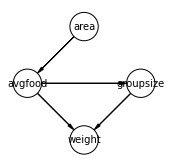

In [1]:
import daft
from causalgraphicalmodels import CausalGraphicalModel

fox_dag = CausalGraphicalModel(
    nodes=["area", "avgfood", "groupsize", "weight"],
    edges=[
        ("area", "avgfood"),
        ("avgfood", "groupsize"),
        ("avgfood", "weight"),
        ("groupsize", "weight"),
    ],
)
pgm = daft.PGM()
coordinates = {
    "area": (1, 1),
    "avgfood": (0, 0),
    "groupsize": (2, 0),
    "weight": (1, -1),
}
for node in fox_dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in fox_dag.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
# plt.gca().invert_yaxis()

See [causalgraphicalmodels repo](https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb) as well.

In [3]:
# get the distribution implied by the graph
print(fox_dag.get_distribution())

P(area)P(avgfood|area)P(groupsize|avgfood)P(weight|avgfood,groupsize)


In [ ]:
# check for d-seperation of two nodes
# sprinkler.is_d_separated("slippery", "season", {"wet"})

In [4]:
# get all the conditional independence relationships implied by a CGM
fox_dag.get_all_independence_relationships()

[('groupsize', 'area', {'avgfood'}),
 ('groupsize', 'area', {'avgfood', 'weight'}),
 ('area', 'weight', {'avgfood'}),
 ('area', 'weight', {'avgfood', 'groupsize'})]

In [5]:
# check backdoor adjustment set
fox_dag.is_valid_backdoor_adjustment_set("avgfood", "weight", {"groupsize"})

False

> Notice that the top three models are m1, m3, and m2. They have very similar WAIC values. The differences are small and smaller in all cases than the standard error of the difference. WAIC sees these models are tied. This makes sense, given the DAG, because as long as a model has groupsize in it, we can include either avgfood or area or both and get the same inferences. Another way to think of this is that the influence of food, adjusting for group size, is (according to the DAG) the same as the influence of area, adjusting for group size, because the influence of area is routed entirely through food and group size. There are no backdoor paths.

> What about the other two models, m4 and m5? These models are tied with one another, and both omit group size. Again, the influence of area passes entirely through food. So including only food or only area should produce the same inference—the total causal influence of area (or food) is just about zero. That’s indeed what the posterior distributions suggest:

In [121]:
az.summary(trace_m4)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.002,0.085,-0.138,0.132,0.001,0.001,5109.0,1895.0,5137.0,2947.0,1.0
b_avgfood,-0.023,0.096,-0.179,0.130,0.001,0.001,5462.0,2151.0,5461.0,2866.0,1.0
sigma,1.010,0.068,0.901,1.115,0.001,0.001,4746.0,4744.0,4691.0,2664.0,1.0


<IPython.core.display.Javascript object>

In [122]:
az.summary(trace_m5)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,-0.001,0.085,-0.134,0.138,0.001,0.001,4672.0,1945.0,4678.0,2680.0,1.0
b_area,0.020,0.096,-0.131,0.172,0.001,0.002,5028.0,1690.0,5027.0,2716.0,1.0
sigma,1.009,0.067,0.901,1.111,0.001,0.001,5496.0,5496.0,5350.0,2971.0,1.0


<IPython.core.display.Javascript object>

The important thing from my perspective is understanding what features can be redundant since some features "pass through"other features.


Appendix: Environment and system parameters

In [25]:
%watermark -n -u -v -iv -w

Last updated: Sat Mar 13 2021

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

numpy     : 1.20.1
seaborn   : 0.11.1
arviz     : 0.11.1
matplotlib: 3.3.4
daft      : 0.1.0
scipy     : 1.6.0
json      : 2.0.9
pymc3     : 3.11.0
pandas    : 1.2.1

Watermark: 2.1.0



<IPython.core.display.Javascript object>

In [26]:
# Custom scripts to show packages and versions in this notebook
def imports():
    import types

    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__


imported_packages = list(imports())

from active_pkg import show_pkg_vers_in_nb

show_pkg_vers_in_nb(imported_packages)

# Name                    Version                   Build  Channel
arviz                     0.11.1                   pypi_0    pypi
daft                      0.1.0                    pypi_0    pypi
matplotlib                3.3.4                    pypi_0    pypi
numpy                     1.20.1                   pypi_0    pypi
pandas                    1.2.1                    pypi_0    pypi
pymc3                     3.11.0                   pypi_0    pypi
scipy                     1.6.0                    pypi_0    pypi
seaborn                   0.11.1                   pypi_0    pypi


<IPython.core.display.Javascript object>